In [2]:
import numpy as np
import matplotlib.pyplot as plt

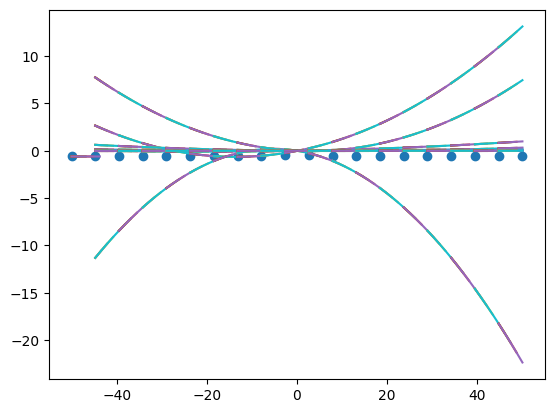

In [48]:
x = np.linspace(-50,50, 20)
y = 1/(1+x**2) + 0.2* np.random.randint(-10,10)
n = len(x) - 1
x_matrix = np.zeros((3*n-1, 3*n))
y_matrix = np.zeros((3*n -1, 1))

# the first 2n rows:
for i in range(0,2*n - 1,2):
    row1 = []
    row2 = []
    if i > 0:
       for o in range(int(i/2)):
          row1.append(0)
          row1.append(0)
          row1.append(0)
          row2.append(0)
          row2.append(0)
          row2.append(0)
    row1.append(x[i - int(i/2)]**2)
    row1.append(x[i- int(i/2)])
    row1.append(1)
    row2.append(x[i- int(i/2) + 1]**2)
    row2.append(x[i- int(i/2) + 1])
    row2.append(1)
    if len(row1) < 3*n:
       for o in range((3*n - len(row2))):
          row1.append(0)
          row2.append(0)
    x_matrix[i] = row1
    x_matrix[i+1] = row2

# the next n - 1 rows:
for i in range(n-1):
   row = []
   if i > 0:
      for o in range(i):
          row.append(0)
          row.append(0)
          row.append(0)
   row.append(2*x[i+1])
   row.append(1)
   row.append(0)
   row.append(-2*x[i+1])
   row.append(-1)
   row.append(0)
   if len(row) < 3*n:
       for o in range((3*n - len(row))):
          row.append(0)
   x_matrix[i + 2*n] = row


y_matrix[0] = y[0]
y_matrix[2*n - 1] = y[len(y) - 1]

for i in range(1, 2*n -1, 2):
   y_matrix[i] = y[i + 1 - int(i/2)]
   y_matrix[i + 1] = y[i + 1 - int(i/2)]

x_matrix = np.delete(x_matrix, obj = 0, axis = 1)
unknown_matrix = np.linalg.solve(x_matrix, y_matrix)


for i in range(1, n):
   
   for o in range(2, 3*n - 4, 3):
      x_to_plot = []
      y_to_plot = []
      for j in np.linspace(x[i], x[i+1], 5):
         x_to_plot.append(j)
         y_to_plot.append(unknown_matrix[o]*j**2 + unknown_matrix[o+1]*j + unknown_matrix[o+3])
         plt.plot(x_to_plot, y_to_plot)


x_1 = []
y_1 = []
for i in np.linspace(x[0], x[1] +1, 5):
   x_1.append(i)
   y_1.append(unknown_matrix[0] * i + unknown_matrix[1])
   plt.plot(x_1,y_1)

plt.scatter(x,y)
plt.show()

